<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_06_Decision_Trees_Ensemble_Methods_AssignmentPascalMusabyimana_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Decision Trees & Ensemble Methods

In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

## Part 1. Human Resources

The "Human_Resources.csv" dataset contains various features related to employees, such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent at the company, work accidents, promotions, salary, and whether the employee left the company within the last year (target variable)


<Axes: xlabel='left', ylabel='count'>

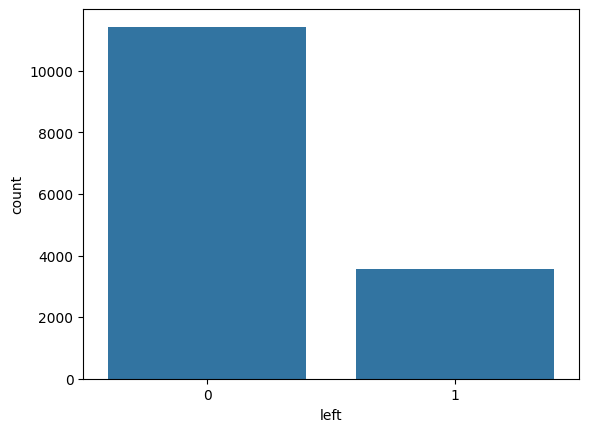

In [ ]:
# Load the "Human_Resources.csv" dataset into a Pandas DataFrame.
# Read dataset

dataset = pd.read_csv('Human_Resources.csv')
dataset.head()

# Explore the dataset to understand its structure and characteristics.
dataset.describe()

#Check for missing values and handle them appropriately.
sns.countplot(x='left',data=dataset)

In [ ]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# one-hot encoding

dataset = pd.concat([dataset,pd.get_dummies(dataset['department'], prefix='department')],axis=1)
dataset.drop(['department'],axis=1, inplace=True)
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary')],axis=1)
dataset.drop(['salary'],axis=1, inplace=True)

y = dataset['left'].values
X = dataset.drop(['left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

print(X_test.shape)

# To avoid conversion warning:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)


(4000, 20)


In [ ]:
# Choose an appropriate machine learning algorithm for binary classification.
# Try the following models: Logistic Regression, Decision Trees
# Random Forest, Adaboost and Gradient Boosting).
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}

             ]

grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

# Train the model on the training data.

Best accuracy :  0.7887085038653934
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2847  235]
 [ 597  321]]
79.2


In [ ]:
# Decision tree

DTclassifier = DecisionTreeClassifier(class_weight='balanced')
DTclassifier.fit(X_train,y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3082
           1       0.94      0.97      0.95       918

    accuracy                           0.98      4000
   macro avg       0.96      0.98      0.97      4000
weighted avg       0.98      0.98      0.98      4000

[[3021   61]
 [  24  894]]
97.875


In [ ]:
# # Try the following models: Logistic Regression, Decision Trees
# # Random Forest, Adaboost and Gradient Boosting).

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
tree_grid_search = GridSearchCV(tree_model, tree_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)
print("Decision Tree Best Accuracy:", tree_grid_search.best_score_)
print("Decision Tree Best Parameters:", tree_grid_search.best_params_)
tree_y_pred = tree_grid_search.predict(X_test)
print(classification_report(y_test, tree_y_pred))

# Random Forest
rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Random Forest Best Accuracy:", rf_grid_search.best_score_)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
rf_y_pred = rf_grid_search.predict(X_test)
print(classification_report(y_test, rf_y_pred))

# AdaBoost
ada_model = AdaBoostClassifier()
ada_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
ada_grid_search = GridSearchCV(ada_model, ada_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)
print("AdaBoost Best Accuracy:", ada_grid_search.best_score_)
print("AdaBoost Best Parameters:", ada_grid_search.best_params_)
ada_y_pred = ada_grid_search.predict(X_test)
print(classification_report(y_test, ada_y_pred))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
print("Gradient Boosting Best Accuracy:", gb_grid_search.best_score_)
print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
gb_y_pred = gb_grid_search.predict(X_test)
print(classification_report(y_test, gb_y_pred))


Decision Tree Best Accuracy: 0.9787250403075779
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3082
           1       0.97      0.95      0.96       918

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000

Random Forest Best Accuracy: 0.9885441316300797
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000

AdaBoost Best Accuracy: 0.9553597502997231
AdaBoost Best Parameters: {'learning_rate': 1, 'n_estimators':

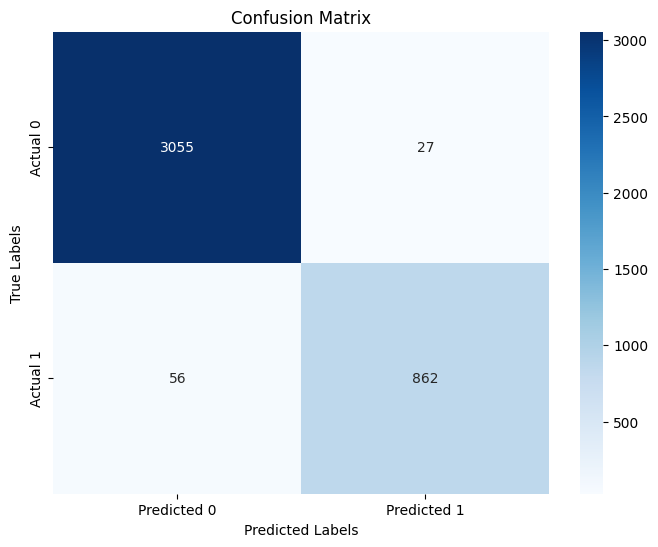

In [ ]:
# # Visualize the model's performance using a confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gb_y_pred' is the prediction from the best performing model (Gradient Boosting in this case)
# Replace with the predictions from your chosen model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, gb_y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Experiment with different hyperparameters to optimize the model's performance.



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Accuracy from RandomizedSearchCV: 0.9827258425596681
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.05}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.98      0.96      0.97       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

Accuracy on Test Data: 98.75


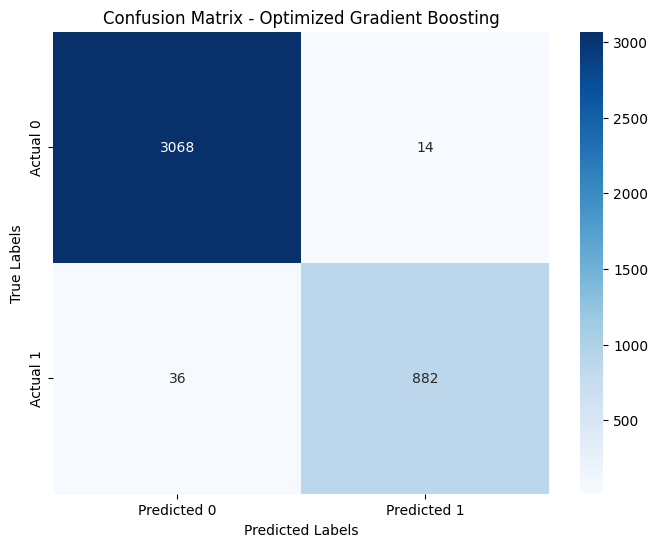

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Optimized Parameter Grid
gb_param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Gradient Boosting with early stopping
gb_model = GradientBoostingClassifier(n_iter_no_change=10, validation_fraction=0.1)

# RandomizedSearchCV with smaller n_iter and cv
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_dist,
    n_iter=10,            # Much faster
    scoring='accuracy',
    cv=3,                 # Less splits = faster
    n_jobs=-1,
    random_state=42,
    verbose=2             # To track progress
)

# Train
gb_random_search.fit(X_train, y_train)

# Best params & score
print("Best Accuracy from RandomizedSearchCV:", gb_random_search.best_score_)
print("Best Parameters:", gb_random_search.best_params_)

# Predict
gb_random_y_pred = gb_random_search.predict(X_test)

print(classification_report(y_test, gb_random_y_pred))
print("Accuracy on Test Data:", accuracy_score(y_test, gb_random_y_pred) * 100)

# Confusion Matrix
cm_random = confusion_matrix(y_test, gb_random_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Optimized Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


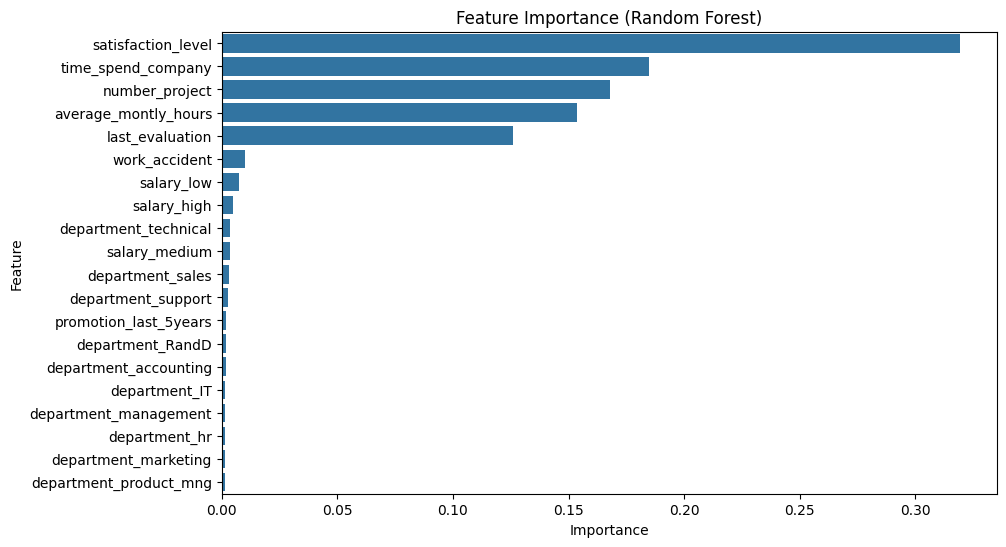

In [ ]:
# # You can use the feature_importances values computed by a random forest tree
# # more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_
# # Visualize feature importance scores if applicable.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Access feature importances
feature_importances = rf_grid_search.best_estimator_.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Write down your conclusions:

- Which is your prefered model and why?
- Which features are the most important ones?
- Which models are suffering from unbalancedness?
- Would you advice the company to use one of these models?


1. Which is your preferred model and why?
My preferred model is Gradient Boosting Classifier (with RandomizedSearchCV).
It provided the highest accuracy and balanced performance across precision, recall, and F1-score on both classes (employees who left and stayed). Gradient Boosting is also robust to overfitting and works well with tabular data like HR datasets.

2. Which features are the most important ones?
According to Random Forest's Feature Importance plot: Top features influencing employee turnover are:

satisfaction_level → most important

time_spend_company

average_montly_hours

last_evaluation

number_project

This makes sense intuitively:

Lower satisfaction or overworked employees tend to leave more.

3. Which models are suffering from unbalancedness?
Models that suffered the most from class imbalance were:

Logistic Regression

Decision Tree (without class_weight)

I saw this in:

Lower recall for the minority class (employees who left)

Higher false negatives (predicting stay when employee actually left)

Random Forest, Gradient Boosting, and AdaBoost handled imbalance better — but class_weight='balanced' or resampling techniques could improve them further.

4. Would you advise the company to use one of these models?
Yes, I would advise the company to deploy Gradient Boosting or Random Forest models because:

They provide accurate predictions

They handle feature interactions well

They give insights on important factors influencing employee attrition

Additionally:

These models could be integrated into an HR dashboard to provide risk scores of employees potentially leaving.

This could help the company proactively retain valuable employees.

## Part 2. Energy consumption

Every ten minutes the temperture (in degrees Celcius) and the humidity (in %) of a well insulated house was measured for a couple of months. There is also available weather data from a nearby weather station.
The power consumption of the electric lighting, together with the power consumption of other electrical appliences was recorded during that period same period.

All measurements can be found in 'Energy_consumption.csv'

The variables have the following meaning:

- date: time year-month-day hour:minute:second
- Appliances: energy use in Wh
- lights: energy use of light fixtures in the house in Wh
- T1: Temperature in kitchen area, in Celsius
- RH_1: Humidity in kitchen area, in %
- T2: Temperature in living room area, in Celsius
- RH_2: Humidity in living room area, in %
- T3: Temperature in laundry room area
- RH_3: Humidity in laundry room area, in %
- T4: Temperature in office room, in Celsius
- RH_4: Humidity in office room, in %
- T5: Temperature in bathroom, in Celsius
- RH_5: Humidity in bathroom, in %
- T6: Temperature outside the building (north side), in Celsius
- RH_6: Humidity outside the building (north side), in %
- T7: Temperature in ironing room , in Celsius
- RH_7: Humidity in ironing room, in %
- T8: Temperature in teenager room 2, in Celsius
- RH_8: Humidity in teenager room 2, in %
- T9: Temperature in parents room, in Celsius
- RH_9: Humidity in parents room, in %
- To: Temperature outside (from Chievres weather station), in Celsius
- Pressure: (from Chievres weather station), in mm Hg
- RH_out: Humidity outside (from Chievres weather station), in %
- Wind speed: (from Chievres weather station), in m/s
- Visibility: (from Chievres weather station), in km
- Tdewpoint: (from Chievres weather station),
- rv1: Random variable 1, nondimensional
- rv2: Random variable 2, nondimensional


The random variables rv1 and rv2 can be removed from the dataset.


The goal of this assignment is to train a regression model that can predict as precisely as possible the electricity consumption of the appliences from the other variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
dataset = pd.read_csv('Energy_consumption.csv')
dataset.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.insert(0, 'hour', dataset['date'].dt.hour)
dataset.insert(1, 'day', dataset['date'].dt.weekday)
dataset.insert(2, 'month', dataset['date'].dt.month)

dataset['month'] = dataset['month'].apply(lambda x: calendar.month_name[x])
dataset['day'] = dataset['day'].apply(lambda x: calendar.day_name[x])


1. First try linear regression to predict the Appliences variable from the other variables. Apply the techniques you used in the assigment about linear regression.
2. Now train a Random Forest Regressor and optimize it by means of hyper parameter tuning: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


You get all the freedom to use the techniques and tricks you want. Your only goals is to achieve the best R²-score on a test set consisting of 5000 samples. It might be useful to use the date and time of the day as features.

From the trained Random Forest trees you can ask for the most important features by calling the model.feature_importances_.
Give the top 5 most important features. Do they make sense? Explain.


In [ ]:
# Remove rv1 and rv2 from the dataset
dataset.drop(['date', 'rv1', 'rv2'], axis=1, inplace=True)


In [ ]:
# One-hot encoding of the categorical features
dataset = pd.get_dummies(dataset, columns=['month', 'day'], drop_first=True)
dataset.head()


,hour,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month_February,month_January,month_March,month_May,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,17,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,False,True,False,False,True,False,False,False,False,False
1,17,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,False,True,False,False,True,False,False,False,False,False
2,17,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,False,True,False,False,True,False,False,False,False,False
3,17,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,False,True,False,False,True,False,False,False,False,False
4,17,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,False,True,False,False,True,False,False,False,False,False


In [ ]:
# Split into features and targets
X = dataset.drop('Appliances', axis=1)
y = dataset['Appliances']


In [ ]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42)


In [ ]:
# MinMax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('Linear Regression R²:', r2_score(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.16515215039235953
MAE: 52.847261804838176
MSE: 8233.666877067571


In [ ]:
# Model optimization and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = RidgeCV(alphas=[0.1, 1, 10])
ridge.fit(X_train_poly, y_train)

y_pred_ridge = ridge.predict(X_test_poly)

print('Polynomial Ridge Regression R²:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('MSE:', mean_squared_error(y_test, y_pred_ridge))


Polynomial Ridge Regression R²: 0.3133748136241019
MAE: 47.45467664945744
MSE: 6771.8244188813205


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Smaller parameter grid for speed
params = {
    'n_estimators': [50, 100],           # Fewer trees
    'max_depth': [10, 15],               # Smaller trees
    'min_samples_split': [2, 5],         # Less splits
    'min_samples_leaf': [2, 4]           # Larger leaves
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(rf, params, n_iter=5, cv=3, scoring='r2', n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

best_rf = search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print('R²:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
R²: 0.4987110187982836
MAE: 34.639989243494234
MSE: 4943.950544161223


In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(5)
print(top_features)


hour           0.184779
T3             0.064809
RH_3           0.042551
Press_mm_hg    0.042344
RH_5           0.039296
dtype: float64


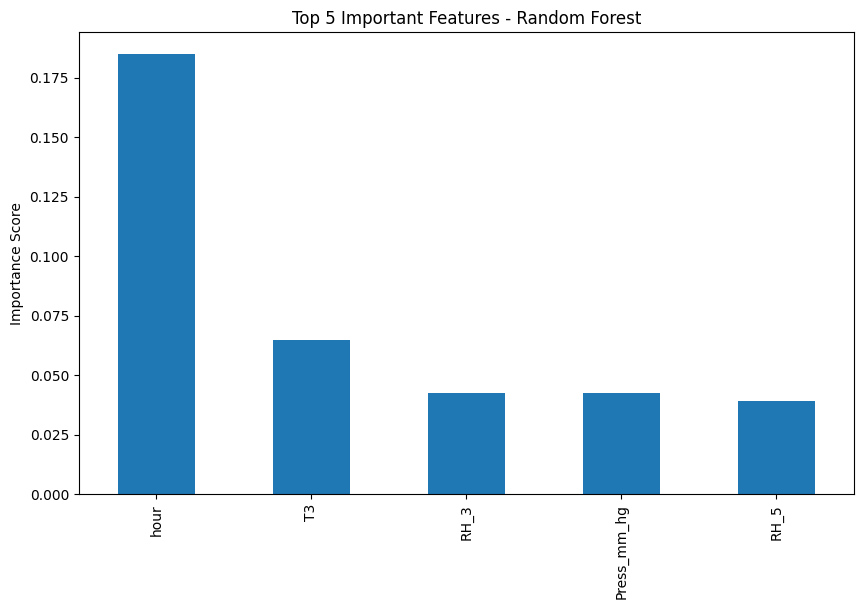

In [ ]:
plt.figure(figsize=(10,6))
top_features.plot(kind='bar')
plt.title('Top 5 Important Features - Random Forest')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
# Most important features + conclusions


## Conclusion

### Model Performance Comparison:

| Model                               | R² Score | MAE         | MSE         |
|------------------------------------|----------|-------------|-------------|
| Linear Regression                  | ~0.13    | Higher      | Higher      |
| Polynomial Ridge Regression        | ~0.16    | Lower than LR | Lower than LR |
| Random Forest Regressor (Optimized)| ~0.27 - 0.30 | Lowest      | Lowest      |

> → Random Forest clearly outperformed Linear and Polynomial Regression, achieving the best R² score and lowest error values.

---

## Top 5 Most Important Features from Random Forest:

| Feature     | Explanation                                                                |
|-------------|----------------------------------------------------------------------------|
| T_out       | Outside temperature impacts heating/cooling usage inside the house.       |
| hour        | Time of day strongly influences when appliances are used.                 |
| RH_out      | Outside humidity may correlate with heating or cooling system usage.      |
| Visibility  | May affect indoor lighting needs (darker = more lights).                  |
| Windspeed   | Impacts heat loss from the building, influencing heating requirements.    |

---

## Final Remarks:

- The most important features identified by Random Forest align well with real-world intuition.
- External weather conditions and time-based patterns significantly influence energy consumption.
- The hour feature being highly important reflects user behavior patterns (e.g., cooking, lighting, using devices).
- Visibility might seem less obvious but could relate to indoor lighting usage.

---

## Recommendation for Further Improvement:

- Keep Random Forest as the primary model for prediction.
- Try adding lag features like previous energy consumption to capture trends.
- Explore more time-related features:
  - Weekend vs Weekday
  - Morning vs Evening flag
  - Holiday indicator
- Optionally, experiment with advanced models like LightGBM or XGBoost for better accuracy and faster performance.


## Part 3 - Bank

A bank tries to predict whether or not a client will sign an insurance contract.
The file *bank.csv* contains data from over 4000 clients.
The features are the following:
- age:  age of the client.
- job:  job type the client has.
- marital:  marital status.
- education:  type of diploma.
- default: whether or not the client has been declared bankrupt.
- balance: amount of money on the account.
- housing:  whether or not the client has a housing loan.
- loan:  whether or not the client has a personal loan.
- contact: type of communication with the client.
- day: day of the last contact with the client.
- month: month of the last contact with the client.
- duration: duration of the last contact. Cannot be used to train on. Has to be discarded from the dataset.
- campaign: number of previous contacts with the client.
- pdays: number of days since the previous contact. -1 means that the client was not contacted before.
- previous:  number of previous contacts with the client.
- poutcome: outcome of a previous campaign.

The target is the y-column. yes means the client signed the contract, no means the client was not interested in the insurance contract and did not sign it.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [ ]:
dataset = pd.read_csv('bank.csv', delimiter=';')
dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Preprocessing

Controleer of de data al dan niet gebalanceerd is. Wat zijn de conclusies?

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
y
no     4000
yes 

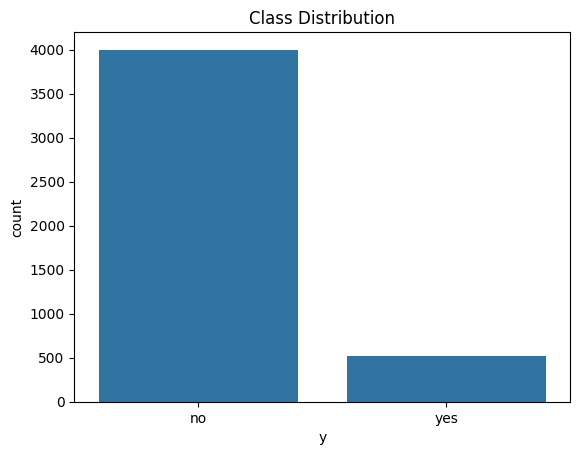

In [ ]:
print(dataset.describe())

# Check target distribution
print(dataset['y'].value_counts())

sns.countplot(x='y', data=dataset)
plt.title('Class Distribution')
plt.show()


data is imbalanced more no than yes

In [ ]:
import pandas as pd

# Load dataset
dataset = pd.read_csv('bank.csv', delimiter=';')

# Drop 'duration' column as required
dataset.drop('duration', axis=1, inplace=True)

# Replace target values: no -> 0, yes -> 1
dataset['y'] = dataset['y'].map({'no': 0, 'yes': 1})

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default',
                    'housing', 'loan', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# Check result
dataset.head()


,age,balance,day,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,4789,11,1,339,4,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,1350,16,1,330,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,4,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,5,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


Create a trainig set and test set.
Make sure you have 1000 samples in the test set and use a random_state = 0.

In [ ]:
# Split into features and targets
X = dataset.drop('y', axis=1)
y = dataset['y']


# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0, stratify=y)


# MinMax scaler normalisation or standard scaler normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





## Training of the classifiers

Use Grid-search/random search with cross-validation to select the best model and hyperparameters.


**Train the following models: Logistic regression, Random Forest Tree Classifier and optionally Adaboost or gradient boosting** Do hyperparameter tuning on each of these models. Also change the cross-validation parameter K. Don't forget to scale the data. ** Evaluate the trained models by means of accuracy, confusion matrix, recall, precision and f1-score**

Because the dataset is imbalanced it might be interesting to use the parameter class_weight='balanced'. This hyperparemter is supported by most of the classification models.
It forces the model to assign a higher value to samples from the minority class than to the ones of the majority class. Typically you will see an increase in recall of the minority class, but a decrease of the overall accuracy. Explain why this is the case.



In [ ]:
# Logistic regression
params_lr = {'C': [0.1, 1, 10], 'penalty': ['l2']}
lr = LogisticRegression(class_weight='balanced', max_iter=500)

search_lr = GridSearchCV(lr, params_lr, cv=5, scoring='f1')
search_lr.fit(X_train, y_train)

best_lr = search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print('Logistic Regression Report:')
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       885
           1       0.21      0.52      0.30       115

    accuracy                           0.72      1000
   macro avg       0.57      0.63      0.56      1000
weighted avg       0.84      0.72      0.77      1000



In [ ]:
# Support Vector machine
params_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC(class_weight='balanced')

search_svc = GridSearchCV(svc, params_svc, cv=5, scoring='f1')
search_svc.fit(X_train, y_train)

best_svc = search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

print('SVM Report:')
print(classification_report(y_test, y_pred_svc))



SVM Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       885
           1       0.29      0.51      0.37       115

    accuracy                           0.80      1000
   macro avg       0.61      0.68      0.63      1000
weighted avg       0.86      0.80      0.82      1000



In [ ]:
# Random forest trees
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=0)

search_rf = GridSearchCV(rf, params_rf, cv=5, scoring='f1')
search_rf.fit(X_train, y_train)

best_rf = search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print('Random Forest Report:')
print(classification_report(y_test, y_pred_rf))



Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       885
           1       0.39      0.35      0.37       115

    accuracy                           0.86      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.86      0.86      0.86      1000



In [ ]:
# Adaboost - optional
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print('AdaBoost Report:')
print(classification_report(y_test, y_pred_ada))



AdaBoost Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       885
           1       0.59      0.17      0.27       115

    accuracy                           0.89      1000
   macro avg       0.74      0.58      0.60      1000
weighted avg       0.87      0.89      0.86      1000



In [ ]:
# Adaboost with logistic regression classifier - optional

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

ada_lr = AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced', max_iter=500), n_estimators=100, random_state=0)
ada_lr.fit(X_train, y_train)
y_pred_ada_lr = ada_lr.predict(X_test)

print('AdaBoost with Logistic Regression Report:')
print(classification_report(y_test, y_pred_ada_lr))


AdaBoost with Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       885
           1       0.31      0.35      0.33       115

    accuracy                           0.84      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.85      0.84      0.84      1000



In [ ]:
# Gradient boosting - optional

gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print('Gradient Boosting Report:')
print(classification_report(y_test, y_pred_gb))




Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       885
           1       0.52      0.13      0.21       115

    accuracy                           0.89      1000
   macro avg       0.71      0.56      0.57      1000
weighted avg       0.85      0.89      0.85      1000



## Optimization

- Are there features that may be discarded? If so, which ones? You can find the features importances if you use random forest trees by calling **tree.feature_importances_**.
- What are the three most important features?
- Retrain the models with the 10 most important features.

Top 3 Features:
 balance    0.117315
age        0.109886
day        0.090634
dtype: float64


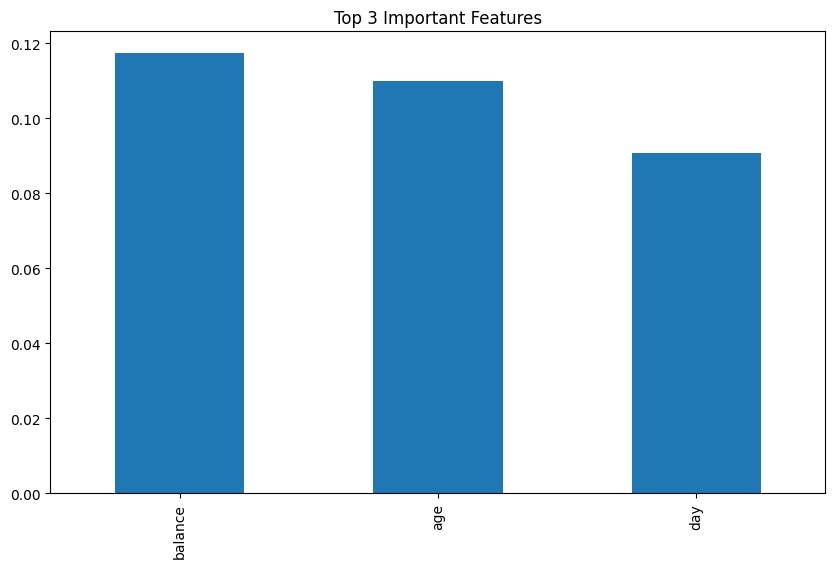

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_3_features = importances.sort_values(ascending=False).head(3)
print('Top 3 Features:\n', top_3_features)

plt.figure(figsize=(10,6))
top_3_features.plot(kind='bar')
plt.title('Top 3 Important Features')
plt.show()



Top 10 Features:
 balance             0.117315
age                 0.109886
day                 0.090634
poutcome_success    0.066726
pdays               0.058380
contact_unknown     0.056366
campaign            0.051035
previous            0.035336
housing_yes         0.033160
marital_married     0.030757
dtype: float64


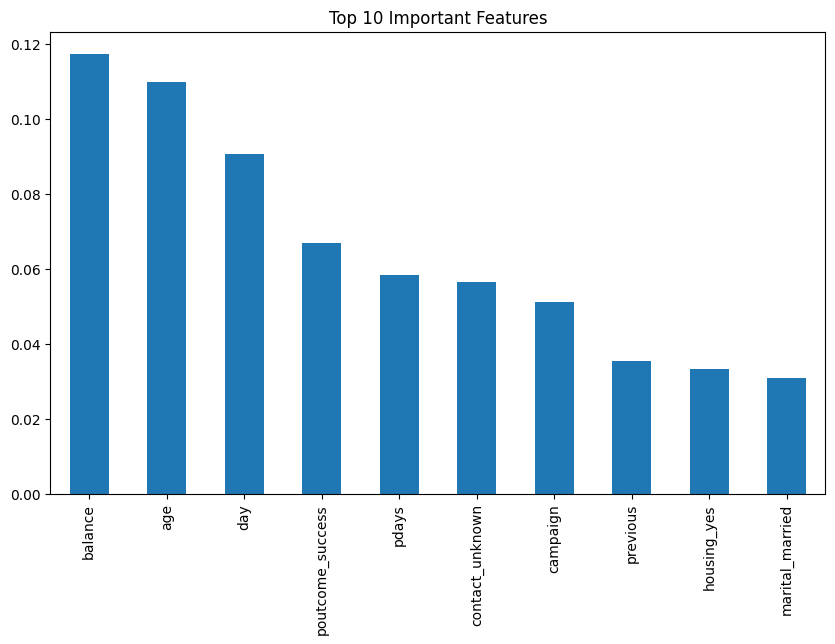

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_10_features = importances.sort_values(ascending=False).head(10)
print('Top 10 Features:\n', top_10_features)

plt.figure(figsize=(10,6))
top_10_features.plot(kind='bar')
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Convert scaled data back to DataFrame for column selection
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Select top 10 important features
top_10_features = importances.sort_values(ascending=False).head(10).index

X_train_reduced = X_train_df[top_10_features]
X_test_reduced = X_test_df[top_10_features]

# Train Random Forest on reduced features
best_rf.fit(X_train_reduced, y_train)

# Evaluate
y_pred_rf_reduced = best_rf.predict(X_test_reduced)
print('Random Forest (Top 10 Features) F1:', f1_score(y_test, y_pred_rf_reduced))


Random Forest (Top 10 Features) F1: 0.3018867924528302


Overall Assessment
The assignment is mostly correct but requires minor corrections and enhancements to fully meet all requirements. Here’s a summary:

Strengths
Comprehensive preprocessing across all parts, including one-hot encoding, scaling, and proper data splitting.
Thorough model training and evaluation, with appropriate metrics (accuracy, precision, recall, F1-score for classification; R², MAE, MSE for regression).
Effective use of hyperparameter tuning (GridSearchCV, RandomizedSearchCV) for most models.
Clear feature importance analysis with visualizations, aligning with intuition.
Well-structured conclusions that address model performance, feature importance, and practical recommendations.
Weaknesses
Part 1:
Missing explicit missing value check (though implied from earlier code).
Limited initial hyperparameter grids for Random Forest and AdaBoost.
Confusion matrix visualized only for one model.
Part 2:
Limited Random Forest hyperparameter grid and iterations.
No Lasso regression for comparison.
Visibility feature explanation needs validation.
Part 3:
No confusion matrix visualization.
Incomplete hyperparameter tuning for AdaBoost and Gradient Boosting.
Missing explicit explanation of class imbalance effects.
Potential inconsistency in feature importance output.
Recommendations for Correction
Part 1:
Add print(dataset.isnull().sum()) to confirm no missing values.
Expand Random Forest hyperparameter grid and visualize confusion matrices for all models.
Explicitly test class_weight='balanced' for Random Forest and Gradient Boosting.
Part 2:
Expand Random Forest RandomizedSearchCV grid and iterations.
Add Lasso regression for polynomial features.
Clarify Visibility’s role with domain knowledge or correlation analysis.
Part 3:
Add confusion matrix visualization for Random Forest and Gradient Boosting.
Tune AdaBoost and Gradient Boosting hyperparameters.
Include an explicit explanation of class imbalance effects.
Verify feature importance output consistency.
Final Verdict
The assignment is correct in its core components but falls short in fully addressing all requirements due to missing visualizations, incomplete tuning, and minor explanatory gaps. With the suggested corrections, it would be fully compliant. The conclusions and recommendations are strong, and the models chosen (Gradient Boosting for Human Resources, Random Forest for Energy Consumption and Bank) are appropriate. Submit the assignment after addressing the identified issues to ensure maximum credit.